In [158]:
import numpy as np
import matplotlib.pyplot as plt

def greedy(epsilon, probability, iteration):
    N = iteration
    rewards = [0] * 5  # accumulate rewards of each arm
    average_rewards = np.zeros((N,1)) 
    num_select = np.array([0,0,0,0,0]) # number of times that arms have been selected
    
    if epsilon == 'd':
        # epsilon is 'decrease'
        for i in range(1,N+1):
            # Choose arm at
            if np.random.random() < 1/i:
                at = np.random.randint(0, 5)
            else:
                at = np.argmax(rewards/num_select)
            num_select[at] = num_select[at] + 1
            if np.random.random() < probability[at]:
                rewards[at] = rewards[at] + 1  
            average_rewards[i-1] = sum(rewards)/i
    else:
        # epsilon is fixed
        e = float(epsilon)
        for i in range(1,N+1):
            if np.random.random() < e:
                at = np.random.randint(0, 5)
            else:
                at = np.argmax(rewards/num_select)
            num_select[at] = num_select[at] + 1
            if np.random.random() < probability[at]:
                rewards[at] = rewards[at] + 1  
            average_rewards[i-1] = sum(rewards)/i
    return average_rewards, rewards, num_select

def UCB(alpha, probability, iteration):
    N = iteration
    rewards = [0] * 5
    average_rewards = np.zeros((N,1))
    num_select = np.array([0,0,0,0,0])
    upperbound = [0] * 5
    empirical_reward = [0] * 5
    for i in range(1,6):
        at = i-1
        num_select[at] = num_select[at] + 1
        if np.random.random() < probability[at]:
                rewards[at] = rewards[at] + 1
        average_rewards[i-1] = sum(rewards)/i
    for i in range(5, N+1):
        for j in range(5):
            empirical_reward[j] = rewards[j] / num_select[j]
            upperbound[j] = np.sqrt( alpha * math.log(i) / ( 2 * num_select[j] ) )
            upperbound[j] = upperbound[j] + empirical_reward[j]
        at = np.argmax(upperbound)
        num_select[at] = num_select[at] + 1
        if np.random.random() < probability[at]:
            rewards[at] = rewards[at] + 1  
        average_rewards[i-1] = sum(rewards)/i
    return average_rewards, rewards, num_select

Greedy1
Numer of times that arms has been selected:
[ 28  21 636 292  23]
Accumulate rewareds of each arms:
[1, 11, 521, 208, 14]
Greedy2
Numer of times that arms has been selected:
[  2   1 992   2   3]
Accumulate rewareds of each arms:
[0, 0, 795, 1, 1]
UCB
Numer of times that arms has been selected:
[ 11  46 608 221 115]
Accumulate rewareds of each arms:
[1, 23, 480, 158, 74]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


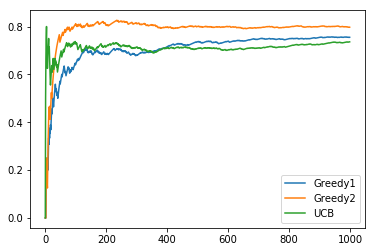

In [170]:
probability = [0.1, 0.5, 0.8, 0.7, 0.65]
average_rewards1, rewards, num_select = greedy('0.1', probability, 1000)
print('Greedy1')
print('Numer of times that arms has been selected:')
print(num_select)
print('Accumulate rewareds of each arms:')
print(rewards)
average_rewards2, rewards, num_select = greedy('d', probability, 1000)
print('Greedy2')
print('Numer of times that arms has been selected:')
print(num_select)
print('Accumulate rewareds of each arms:')
print(rewards)
average_rewards3, rewards, num_select = UCB(2 , probability, 1000)
print('UCB')
print('Numer of times that arms has been selected:')
print(num_select)
print('Accumulate rewareds of each arms:')
print(rewards)

label = ['Greedy1','Greedy2','UCB']
plt.plot(average_rewards1)
plt.plot(average_rewards2)
plt.plot(average_rewards3)
plt.legend(label)  
plt.show()


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


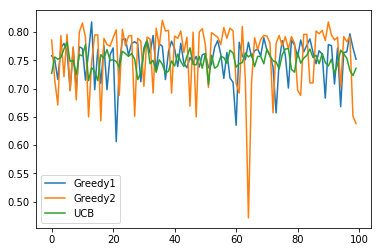

In [171]:
probability = [0.1, 0.5, 0.8, 0.7, 0.65]
rewards_greedy1 = [0] * 100
rewards_greedy2 = [0] * 100
rewards_UCB = [0] * 100
for i in range(100):
    average_rewards1, rewards, num_select = greedy('0.1', probability, 1000)
    rewards_greedy1[i] = average_rewards1[999]
    average_rewards2, rewards, num_select = greedy('d', probability, 1000)
    rewards_greedy2[i] = average_rewards2[999]
    average_rewards3, rewards, num_select = UCB(2 , probability, 1000)
    rewards_UCB[i] = average_rewards3[999]

label = ['Greedy1','Greedy2','UCB']
plt.plot(rewards_greedy1)
plt.plot(rewards_greedy2)
plt.plot(rewards_UCB)
plt.legend(label)  
plt.show()

In [172]:
average_reward1 = sum(rewards_greedy1)/100
average_reward2 = sum(rewards_greedy2)/100
average_reward3 = sum(rewards_UCB)/100
print('Average rewards:')
print('Greedy1:',average_reward1)
print('Greedy2:',average_reward2)
print('UCB:',average_reward3)

Average rewards:
Greedy1: [0.75307]
Greedy2: [0.75967]
UCB: [0.74952]
